# Report 1: Investigating Root Finding Algorithms

**Olivia Gough / 170060840 / AP17023**

In this report I will be investigating three methods of root finding; bisection method, regular falsi and the Newton-Raphson method. This report will show which functions the algorithms can be applied to, how many iterations they require and if/where they will converge.

In [1]:
def bisection_step(f, bounds):
    l, u = bounds
    if f(l)*f(u) < 0:
        m = (l+u)/2
        if f(l)*f(m) > 0:
            l = m
        else:
            u = m
        return l,u

Above is the interval bisection method. The input is a function and a lower and upper bound within which a root exists.
The function then finds the midpoint of the bounds and determines which side of the midpoint the root lies on by finding a 
negative sign when f of the bounds are multiplied together. The function then returns the new bounds.

In [2]:
def regula_falsi_step(f, bounds):
    l, u = bounds
    numerator = (l*f(u)) - (u*f(l))
    denominator = f(u) - f(l)
    m = numerator / denominator
    
    if f(l)*f(m) < 0:
        return l,m
    else:
        return m,u

This is the regula falsi method. It takes the bounds of an interval containing a root and calculates a line 
between them in order to find a new range. It works quicker than the bisection step as it predicts a root better
than just guessing the midpoint.

In [3]:
def CD(f,x,h=1e-5):
    return (f(x+(0.5*h))-f(x-(0.5*h)))/h
    
def newton_step(f,x0):
    f_prime = CD(f, x0)
    return x0 - (f(x0)/f_prime)

The function CD returns an approximate solution for the derivative of a funtion. This will be required for 
the Newton-Raphson method, which follows the derivative down to the x-axis rather than the function itself.

## Which functions can these algorithms be applied to and how many iterations does it take to find a root?

To test out the effectiveness of the different algorithms, I have picked a number of different functions to investigate with, defined below:

$n(x) = x^3 - 2x + 2$<br>

$m(x) = \cos(x)$<br> 

$
p(x) = \begin{cases}\sqrt{x} & x \geq 0 \\
-\sqrt{-x} & x \leq 0\end{cases}
$<br>

-$q(x) = (x-1) / (x-2)$<br>

In [4]:
from numpy import cos, sqrt
from pylab import vectorize

def m(x):
    return x**3 - 2*x + 2

def n(x):
    return cos(x)

@vectorize
def p(x):
    if x >= 0:
        return sqrt(x)
    else:
        return -sqrt(-x)

def q(x):
    return (x-1) / (x-2)

It will be useful to plot the functions on a graph so we can see where the roots are, approximately. The code below imports some functions to enable graph plotting within the notebook, creates an array of x and y values to plot, plots and labels the functions, then finally adds and grid and title.

<IPython.core.display.Javascript object>


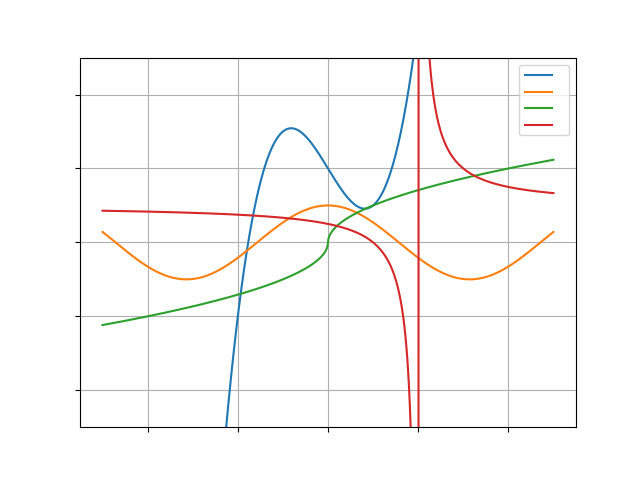

Text(0.5, 1.0, 'graph of functions to be investigated')

In [36]:
%matplotlib notebook
from pylab import plot, linspace, grid, ylim, legend, title

x = linspace(-5, 5, 500)
ylim(-5,5)


plot(x, m(x), label = "m(x)")
plot(x, n(x), label = "n(x)")
yp = [p(z) for z in x]
plot(x, p(x), label = "p(x)")
plot(x, q(x), label = "q(x)")


grid()
legend()
title("graph of functions to be investigated")

I will now use each of the algorithms to find a root for each function along with how many iterations of the algorithm it took to an accuracy of $10^-6$. I will define a 'test' function for each of the algorithms, containing a loop to repeat the step until I have reached my desired level of accuracy. It will return a new set of bounds accurate to 6 decimal places and tell me how many iterations of the algorithm it took to get there. The results are printed out in formatted columns so the output is easy to interpret. 
I will start with the bisection method, followed by regula falsi and finally Newton-Raphson.

**Bisection Step Method**

In [7]:
def test_bisection(function, bounds, name):
    print("\nBisection Step Method for {}:".format(name))
    print("{:<18} {:<18} {:<18}".format("lower","upper","iterations"))
    iterations = 0 
    l, u = bounds
    while (u-l)**2 > (1e-8)**2:
        l, u = bisection_step(function, (l, u))
        iterations += 1
    print("{:<18.16f} {:<18.16f} {:<18}".format(l, u, iterations))
    
test_bisection(m, (-2,0), "m(x)")
test_bisection(n, (4,6), "n(x)")
test_bisection(p, (-0.1,1), "p(x)")
test_bisection(q, (0,1.5), "q(x)")


Bisection Step Method for m(x):
lower              upper              iterations        
-1.7692923545837402 -1.7692923471331596 28                

Bisection Step Method for n(x):
lower              upper              iterations        
4.7123889774084091 4.7123889848589897 28                

Bisection Step Method for p(x):
lower              upper              iterations        
-0.0000000052154064 0.0000000029802322 27                

Bisection Step Method for q(x):
lower              upper              iterations        
0.9999999962747097 1.0000000018626451 28                


This method worked for all four of the functions I tested it with, given a root in an appropriate range. Although the sample size was small, I think this method would work for any given function. The algorithm consistently took around 28 iterations.

**Regula Falsi Method**

In [8]:
def test_regula_falsi(function, bounds, name):
    print("\nRegula Falsi Method for {}:".format(name))
    print("{:<18} {:<18} {:<18}".format("lower","upper","iterations"))
    iterations = 0 
    l, u = bounds
    while (u-l)**2 > (1e-8)**2:
        l, u = regula_falsi_step(function, (l, u))
        iterations += 1
    print("{:<18.16f} {:<18.16f} {:<18}".format(l, u, iterations))
    
test_regula_falsi(m, (-2,0), "m(x)")
test_regula_falsi(n, (0,2), "n(x)")
test_regula_falsi(p, (-0.5,0.1), "p(x)")
#test_regula_falsi(q, (0,1.8), "q(x)")


Regula Falsi Method for m(x):
lower              upper              iterations        
-1.7692923542386314 -1.7692923542386312 21                

Regula Falsi Method for n(x):
lower              upper              iterations        
1.5707963267948966 1.5707963268154532 5                 

Regula Falsi Method for p(x):
lower              upper              iterations        
-0.0000000013765880 0.0000000067782118 17                


This method was successful in root finding for three out of four of the tested functions. It didn't work for $q(x)$, because at $x=2$, it encountered a division by zero error. I think this error would occur for any function which contains negative powers of $x$. 

**Newton-Raphson Method**

In [9]:
def test_newton(function, x0, name):
    
    print("\nNewton-Raphson Method for {}:".format(name))
    print("{:<18} {:<18}".format("root","iterations"))
    
    iterations = 0 
    x1 = newton_step(function, x0)
    
    while (x0-x1)**2 > (1e-8)**2:
        x0 = x1
        x1 = newton_step(function, x0)
        iterations += 1
        if iterations > 500:
            print("root not found within 500 iterations")
            break
    print("{:<18.16f} {:<18}".format(x1, iterations))
    
test_newton(m, -1.6, "m(x)")    
test_newton(n, 1.5, "n(x)")
#test_newton(q, -0.5, "q(x)")
test_newton(p, 1, "p(x)")


Newton-Raphson Method for m(x):
root               iterations        
-1.7692923542386314 4                 

Newton-Raphson Method for n(x):
root               iterations        
1.5707963267948966 2                 

Newton-Raphson Method for p(x):
root               iterations        
root not found within 500 iterations
0.9999999999424887 501               


This method worked well for two of the four functions I tested. With $q(x)$, again, I encountered a division by zero error, which is a limitation similar to the regular falsi. For the complex function $p(x)$, it wasn't giving any output so decided to add the condition that if there had been 500 iterations of the algorithm with no success at finding the root, then the loop should stop. After this 'break' function was added, it was clear that this algorithm was unable to find a root in an appropriate number of iterations. I think given an appropriate function, from the functions I tested, I would predict that this method would find a root in less than 5 iterations; quicker than the other two algorithms.

## Convergence 

**Is it possible that they will not converge?**<br>
The bisection method effectively found a root for every function I tested within a predictable number of iterations. The bisection method is always guaranteed to converge as the gap between the interval is halved in each step which means the limit of the bounds will always converge linearly to a common point. There is also no risk of getting any numerical errors, such as a dision by zero error.<br>
Regula falsi method can't converge with functions with a negative power of $x$. However, it successfully converged for the other functions, with a linear rate of convergence.<br>
The Newton-Raphson method converged successfully on two of the roots, much more rapidly than the previous two methods. It failed on $q(x)$ due to division by zero error, similar to Regula Falsi. It also failed on finding a root for $p(x)$, seeming to oscillate between $x$ and $-x$. Given enough iterations, it could converge on the correct root eventually but failed to do so within 500 iterations, which I decided was an appropriate number to test. Newton's method is only guaranteed to converge if certain conditions are satisfied AND the starting point is appropriate, for example if a root approaches zero asymtotically as in $q(x)$. If $f'$ vanishes at an iteration point or between the current estimate and root, the method will fail to converge.

**Is it possible that they will converge, but not to the nearest root?**<br>
With the functions I tested, I did not find a method that converged but not of the closest root. However, it may be possible that this could happen but I failed to find any counter-examples.

**Is it possible that they will converge to a value that is not a root?**<br>
To test this out, I will take some function and use bounds with no interval in to see if the methods converge. 

In [ ]:
#test_bisection(m, (5,6), "m(x)")

I predicted this method would converge even if you input bounds with no root, however, my code would not run. This may be due to an error in the code written, or proof that the algorithm will not converge to a value that is not a root. I think it is more likely that it's due to an error in my code as you would expect the interval to converge down to a value.

In [ ]:
#test_regula_falsi(m, (0,5), "m(x)")

The regula falsi method seemed to create an infinite loop, suggesting it would not converge until it found an actual root. I predict this algorithm will not converge on a value that isn't a root, having not been able to find any counter-examples.

In [10]:
test_newton(m, 447, "m(x)")


Newton-Raphson Method for m(x):
root               iterations        
-1.7692923542386314 29                


I tried various negative and positive values for the starting point of the Newton-Raphson method, but each seemed to return the actual root. Upon trying some relatively large starting points in the order magnitude $10^3$, the algorithm could not find a root within 500 iterations, but that is not to suggest it could not have found a root given more iterations. I could not find any counter-examples to suggest this method would converge on a vale that is not a root.<br><br>
Below, I have plotted a graph to show the starting value of the Newton-Raphson method against how many iterations the algorithm took to find the root.

<IPython.core.display.Javascript object>


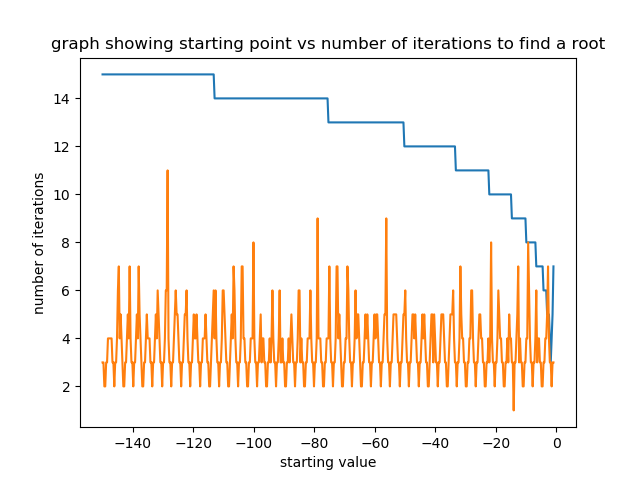

In [13]:
%matplotlib notebook
from pylab import xlabel, ylabel
def newton_iterations(f):
    iteration_list = []
    bounds = linspace(-150,-1,500)
    for b in bounds:
        test = b
        iteration = 0
        x1 = newton_step(f,b)
        while (b - x1)**2 > (1e-8)**2:
            b = x1
            x1 = newton_step(f,b)
            iteration += 1
        iteration_list.append(iteration)
    plot(bounds, iteration_list)
    xlabel("starting value")
    ylabel("number of iterations")
    title("graph showing starting point vs number of iterations to find a root")
    grid()
    
newton_iterations(m)
newton_iterations(n)

The two functions I tested produce some interesting results. For $m(x)$, we see that the further the starting point is from the actual root, the more iterations it takes, as expected, but the graph produces an interesting linear pattern which colour be further investigated.

**Is it possible that there is a root within the initial range that they do not find?**<br>
Due to the nature of the bisection method with the range halving at every iteration, it will always converge onto a point so no, it is not possible that this algorithm would not find a root.<br>
As seen previously, the regula falsi failed to find a root when he function contained a negative power of $x$, returning a division by zero error. For this reason, yes, it is possible that this method would not find a root in a given range.<br>
Finally, as shown previously, it is possible that Newton's method could also fail to find a root in a given range. Newton's method is only guaranteed to converge if certain conditions are satisfied and the starting point is appropriate. If $f'$ vanishes at an iteration point or between the current estimate and root, the method will fail to converge. 

## Further discussion of conclusions and ways in which algorithms might be combined

**Pros and Cons of the Bisection Method:**<br>
This algorithm will always converge and there are no functions it won't work for, halving the range until it converges to a point with any desired precision, within reason. It will never have division by zero or infinite loop errors. However, this algorithm is not the most efficient, needing around 28 iterations to get a precision of 6 decimal places, which is relatively high compared to the other methods I tested. I don't have a definitive answer on whether this algorithm will converge on a value that isn't a root from this investigation.<br><br>
**Pros and Cons of the Regula Falsi Method:**<br>
This algorithm will converge unless the function contains a negative power of $x$, and in that case we will get a division by zero error. Other advantages are it converges quicker than the bisection technique and it does not require a derivative, as in the Newton-Raphson method. It also won't converge on a value that isn't a root, so given a bounds with no root it will infinitely loop. This could possibly be stopped by putting a break in the loop after 500 iterations, like in the Newton-Raphson and printing 'no root within 500 iterations'. However this doesn't definitively tell the user that there's no root so this is a downfall of he algorithm.<br><br>
**Pros and Cons of the Newton-Raphson Method**<br>
This algorithm was the most powerful of the three, managing to converge onto the actual root even if that starting point was relatively far from the root, usually within under around 10 iterations, as shown from the graph. The algorithm did struggle however with an asymtote, oscillating infinitely between two values. 

**Combining algorithms**<br>
I think it would be interesting to combine the bisection method with Newton-Raphson. I think i could be effective initially using bisection to narrow down a range of values, then the Newton-Raphson taking over to very quickly converge down to a very precise degree of accuracy. <br>If you replace the derivative in the Newton-Raphson method with a finite difference, you get the secant method. It uses a succession of roots and secant lines to better approximate a root of a function. <br>An algorithm that combines two methods is 'Brent's Method'. This is a combination of the bisection method and the secant method and inverse quadratic interpolation. At every iteration, this technique selects one of the afforementioned three methods to get a result and proceeds by doing a step according to that method. It has the reliability we found from the bisection method but in a more efficient format.


In [50]:
def secant_step(f, bounds):
    x0, x1 = bounds
    x2 = (x0*f(x1) - x1*f(x0)) / (f(x1)-f(x0))
    return x1, x2

secant_step(m, (2,1))

(1, 0.8)

In [49]:
def test_secant(function, bounds, name):
    print("\nSecant Step Method for {}:".format(name))
    print("{:<18} {:<18} {:<18}".format("xn","xn+1","iterations"))
    iterations = 0 
    x0, x1 = bounds
    while (x1-x0)**2 > (1e-6)**2:
        x0, x1 = secant_step(function, (x0, x1))
        iterations += 1
    print("{:<18.16f} {:<18.16f} {:<18}".format(x0, x1, iterations))
    
test_secant(m, (2,1), "m(x)")
test_secant(n, (4,6), "n(x)")


Secant Step Method for m(x):
xn                 xn+1               iterations        
-1.7692923313263726 -1.7692923542382779 90                

Secant Step Method for n(x):
xn                 xn+1               iterations        
4.7123889721330539 4.7123889803846897 5                 


Above is the code for a single step of the secant method followed by a test to see how many iterations it takes for an accuracy of 6 decimal places. Due to the time restraints of this project I don't have time (or the patience left he he!) to code inverse quadratic interpolation, but this could be combined with the bisection algorithm for 'Brent's Method'. Please give me an extra mark for including this - it gave me a really big headache.